<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리
## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


결측값이 있을시, 평균값으로 대체 or 결측치 제거

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42, stratify=target
)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


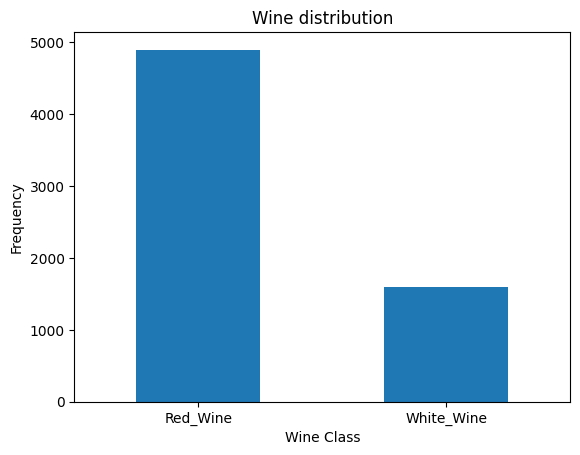

In [15]:
labels = ['Red_Wine', "White_Wine"]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine['class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Wine distribution')
plt.xticks(range(2), labels)
plt.xlabel("Wine Class")
plt.ylabel("Frequency")

plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7829517029055224
0.7761538461538462


In [17]:
print(lr.coef_, lr.intercept_)

[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]


## 결정 트리

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9978833942659227
0.8646153846153846


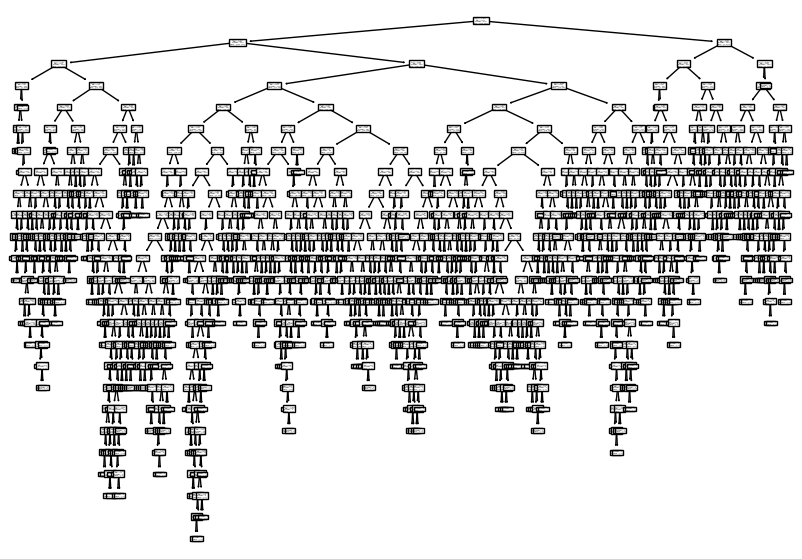

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

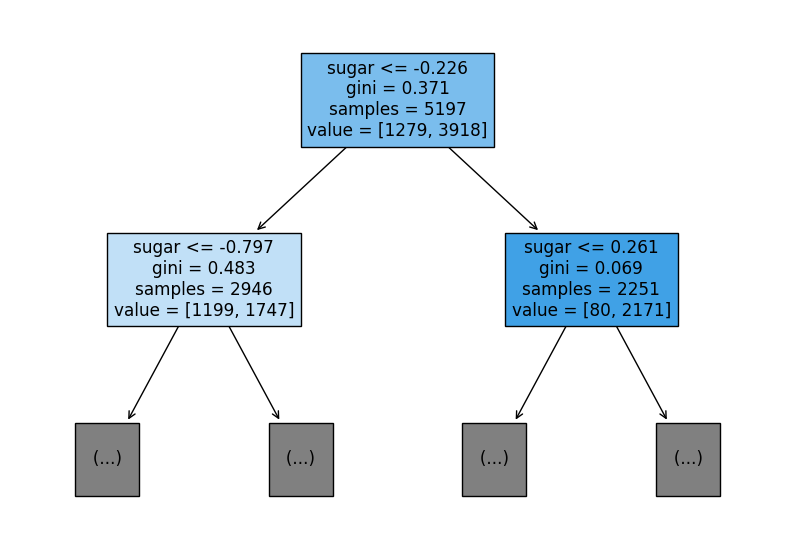

In [20]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기 - 규제 방법 1

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8458726188185491
0.8407692307692308


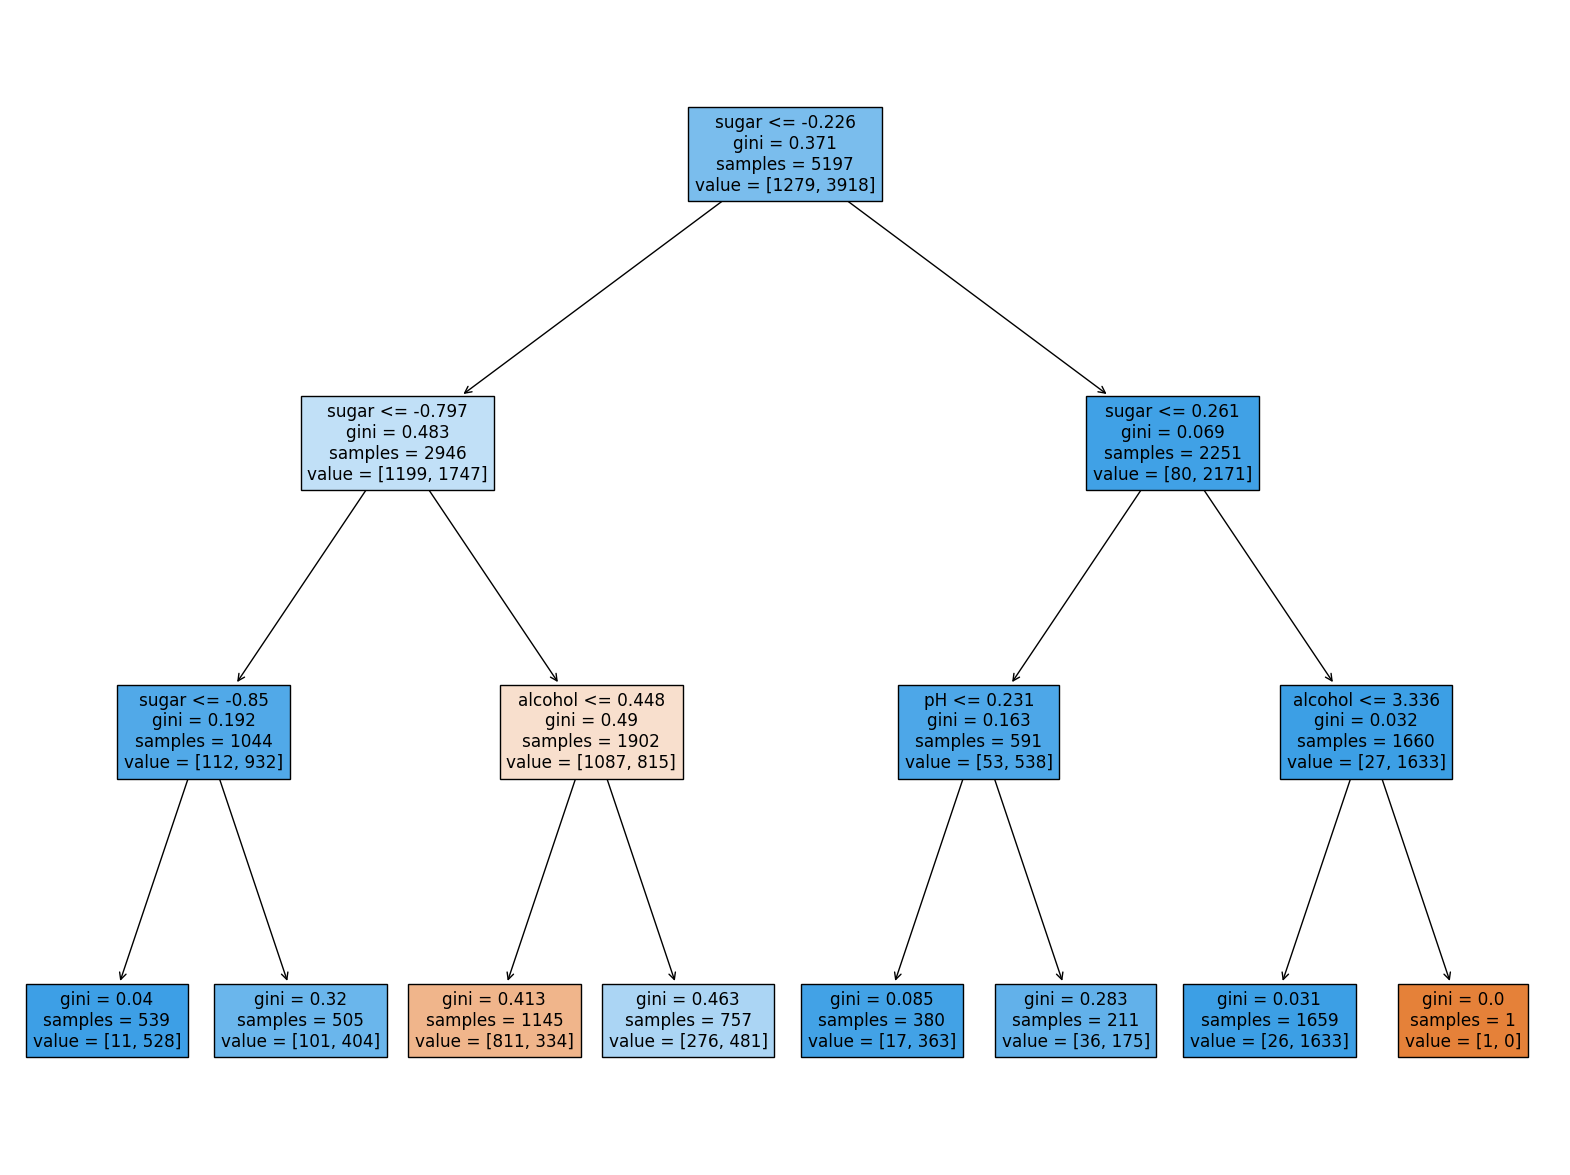

In [22]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [23]:
print(dt.feature_importances_)

[0.14086835 0.85360568 0.00552597]


## 확인문제
결정트리 특성 값의 스케일은 계산에 영향을 미치지 않으므로 전처리가 필요없음

In [24]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8893592457186839
0.8569230769230769


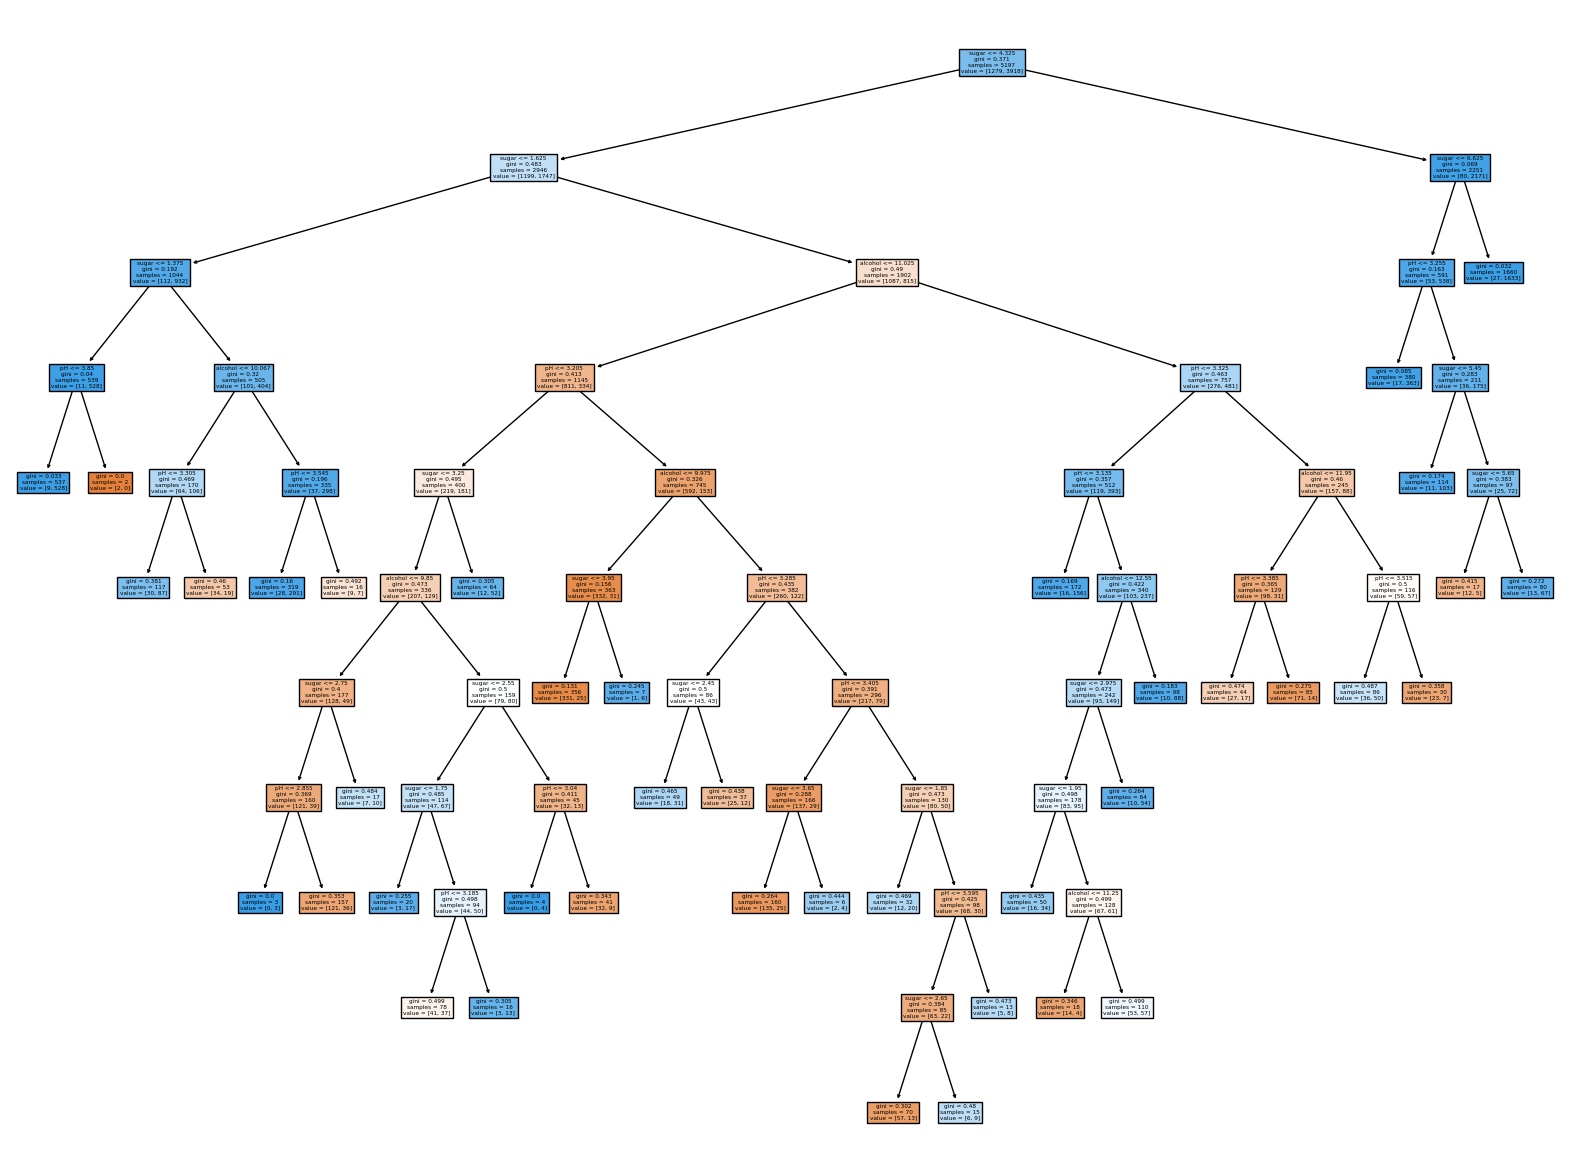

In [25]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 특성 중요도

In [27]:
print(dt.feature_importances_)

[0.16163629 0.69101886 0.14734486]


## 세 개의 특성 중에서 당도만 사용해서 훈련해보자

In [33]:
sugar = wine['sugar'].to_numpy()
print(sugar.shape)
sugar = sugar.reshape(-1,1)
print(sugar.shape)

(6497,)
(6497, 1)


In [43]:
from sklearn.model_selection import train_test_split
sugar = wine['sugar'].to_numpy()
sugar = sugar.reshape(-1,1)
target = wine['class'].to_numpy()

train_sugar, test_sugar,train_sugar_target, test_sugar_target = train_test_split(
    sugar, target, test_size=0.2, random_state=42, stratify=target
)

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_sugar, train_sugar_target)

print(dt.score(train_sugar, train_sugar_target))
print(dt.score(test_sugar, test_sugar_target))

0.833365403117183
0.8338461538461538


In [44]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_sugar, train_sugar_target)

print(dt.score(train_sugar, train_sugar_target))
print(dt.score(test_sugar, test_sugar_target))

0.833365403117183
0.8338461538461538
